Project Goal: To perform an end-to-end data analysis on the Netflix dataset (`netflix_data.csv`) 
involving exploratory data analysis (EDA), visualization, in-depth analysis, interpretation, and providing recommendations.


In [65]:
### Step-by-Step Guide
#### 1. Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Display settings for better visualization
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [67]:
#### 2. Load the Dataset
df = pd.read_csv('netflix_data.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [73]:
# Display the first few rows
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies


In [75]:
#### 3. Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [77]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert relevant columns to appropriate data types
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = df['release_year'].astype(int)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [79]:
#### 4. Exploratory Data Analysis (EDA)
# Summary statistics
df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [81]:
# Unique values in each column
df.nunique()

show_id         4812
type               2
title           4812
director        3615
cast            4690
country           72
date_added      1289
release_year      71
duration         193
description     4807
genre             31
dtype: int64

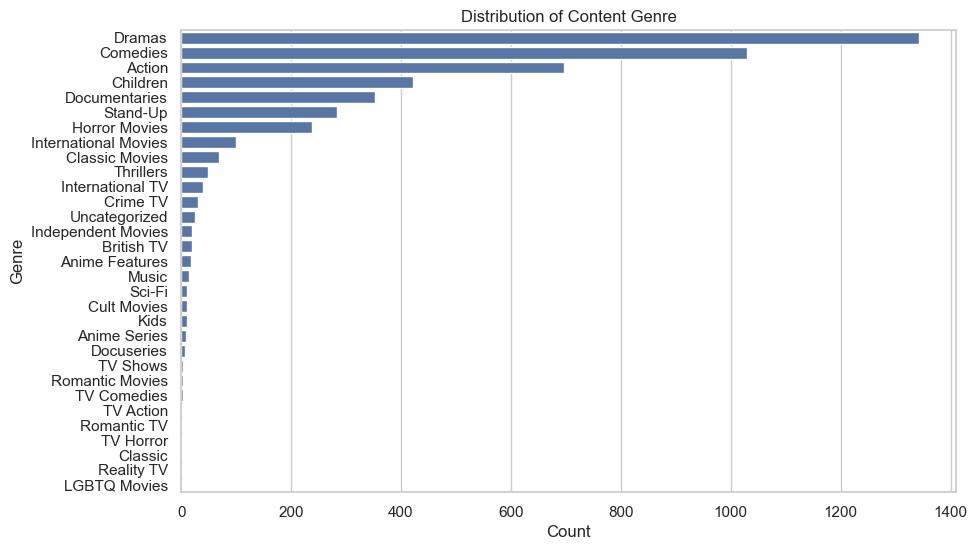

In [44]:
# Visualizations:
#Distribution of content ratings
plt.figure(figsize=(10, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Distribution of Content Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

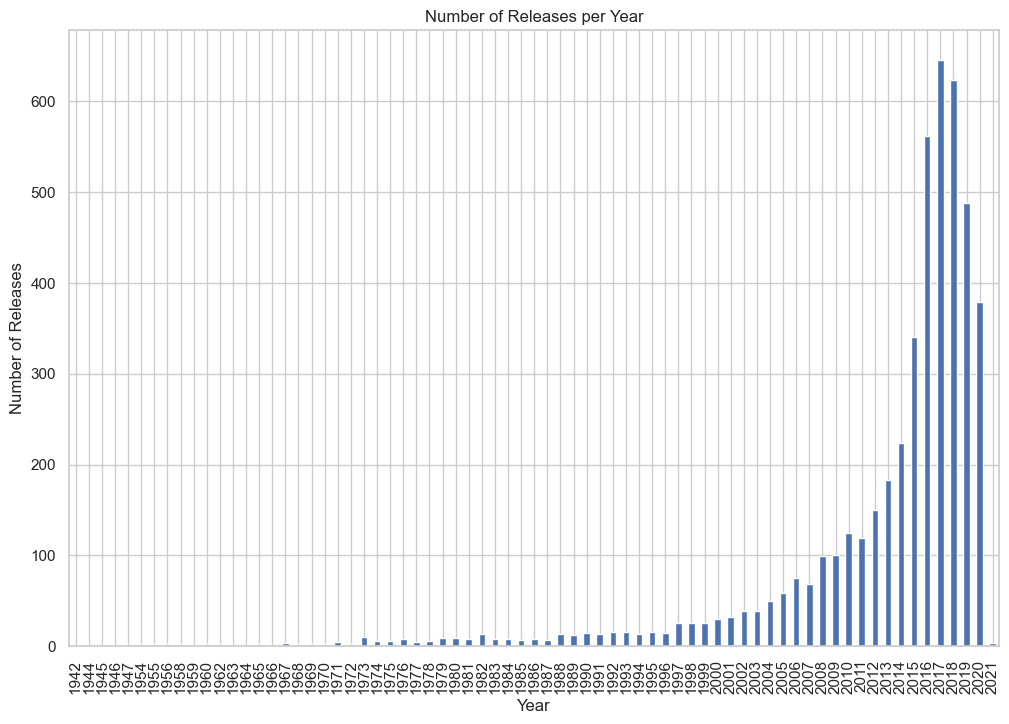

In [34]:
# Number of releases per year
plt.figure(figsize=(12, 8))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

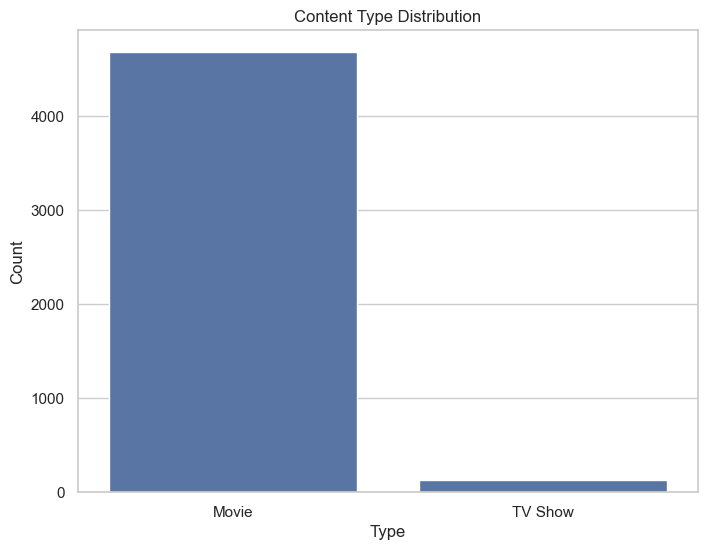

In [36]:
# Content type distribution (Movies vs TV Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

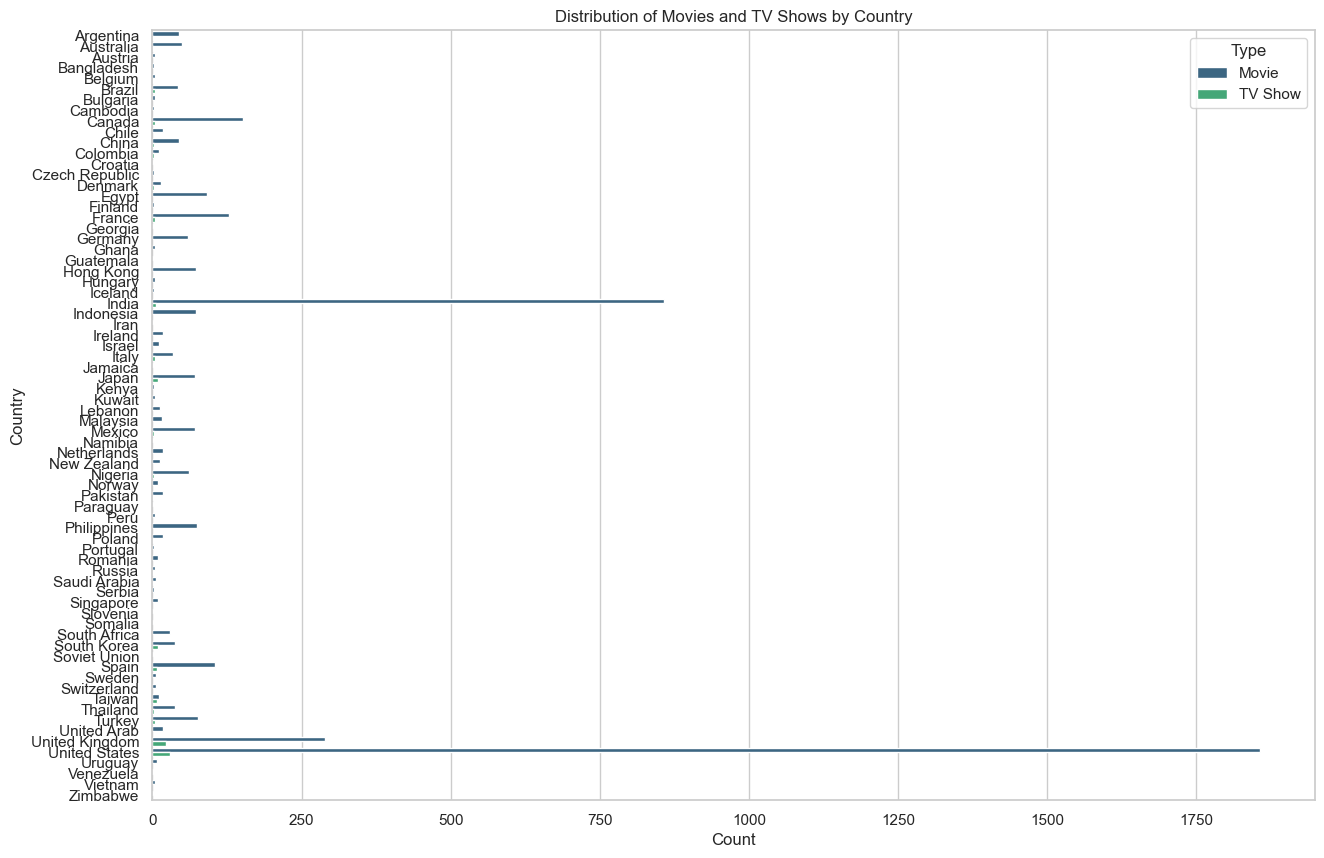

In [99]:
# Group the data by country and type
country_type_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='country', hue='type', data=country_type_counts, palette='viridis')
plt.title('Distribution of Movies and TV Shows by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Type')
plt.show()

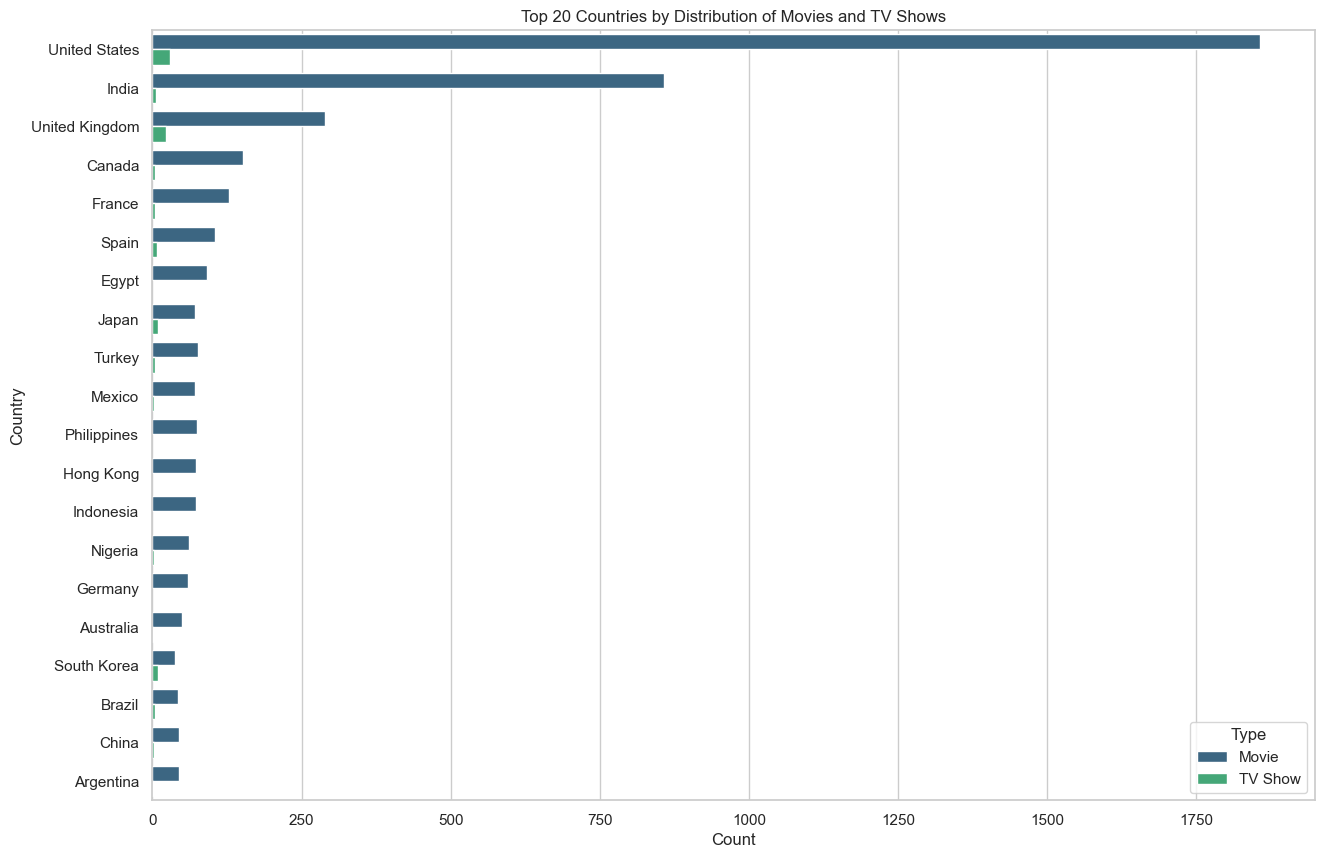

In [101]:
# Group the data by country and type, then count the occurrences
country_type_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

# Get the top 20 countries based on the total count of movies and TV shows
top_countries = country_type_counts.groupby('country')['count'].sum().nlargest(20).index

# Filter the data for the top 20 countries
top_country_data = country_type_counts[country_type_counts['country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='country', hue='type', data=top_country_data, palette='viridis', order=top_countries)
plt.title('Top 20 Countries by Distribution of Movies and TV Shows')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Type')
plt.show()

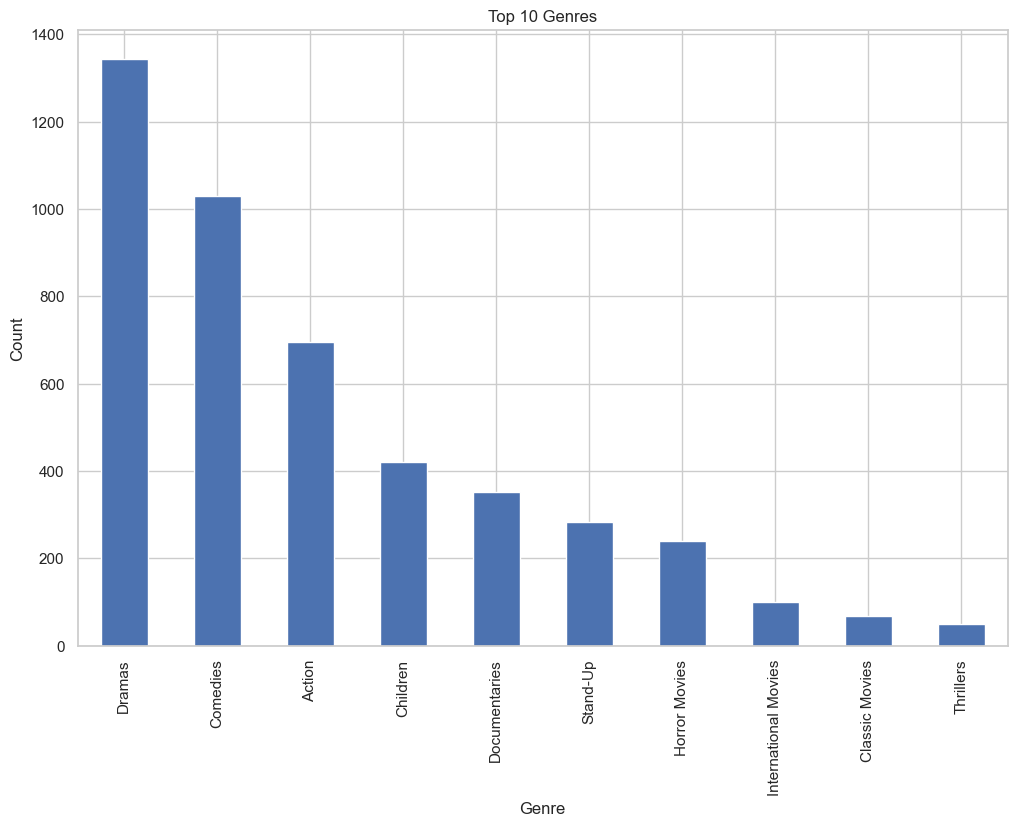

In [40]:
# Top 10 genres
plt.figure(figsize=(12, 8))
df['genre'].str.split(',').explode().value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

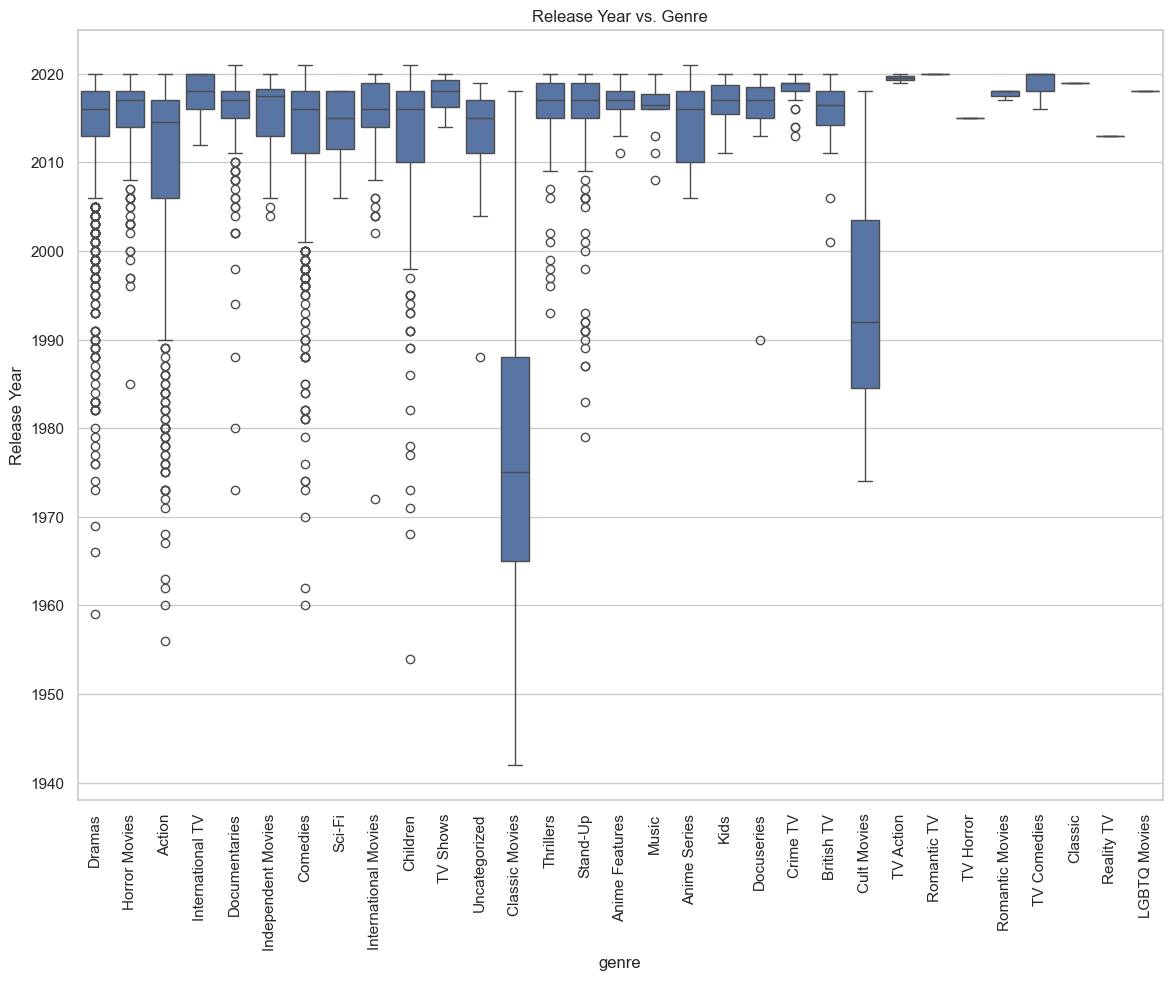

In [46]:
#### 5. In-Depth Analysis
# Analysis of Relationships: Relationship between release year and content rating
plt.figure(figsize=(14, 10))
sns.boxplot(x='genre', y='release_year', data=df)
plt.title('Release Year vs. Genre')
plt.xlabel('genre')
plt.ylabel('Release Year')
plt.xticks(rotation=90)
plt.show()

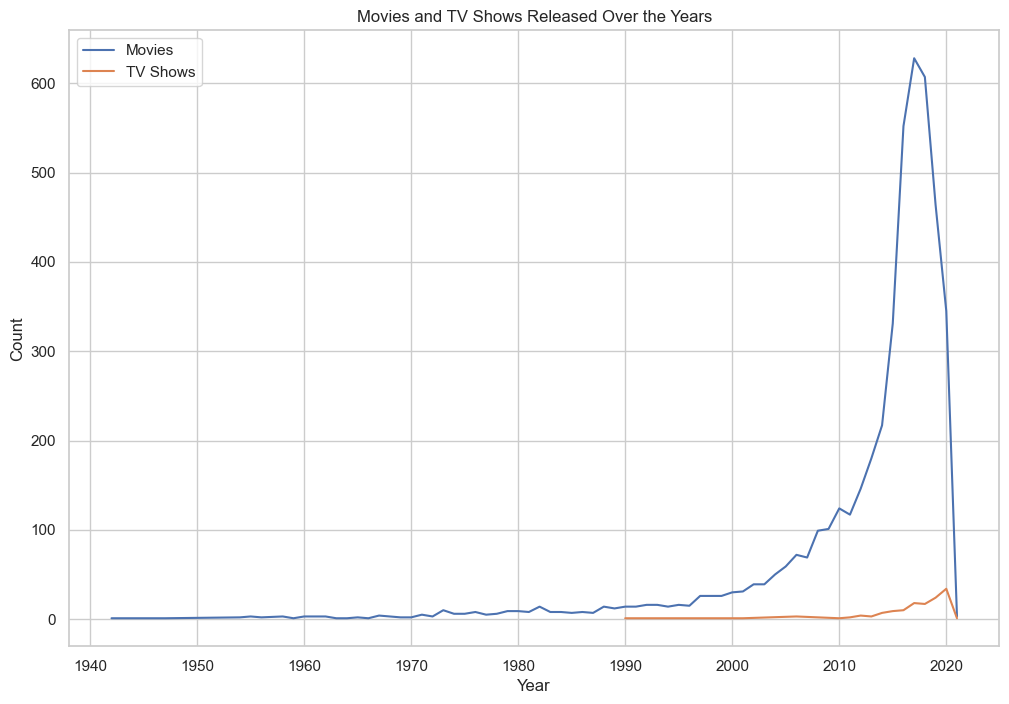

In [42]:
# Analysis of content type over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[df['type'] == 'Movie'].groupby('release_year').size(), label='Movies')
sns.lineplot(data=df[df['type'] == 'TV Show'].groupby('release_year').size(), label='TV Shows')
plt.title('Movies and TV Shows Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

#### 6. Interpretation and Insights
1. **Content Ratings**: The majority of content on Netflix is rated "TV-MA" and "TV-14", indicating a significant portion of content is geared towards mature audiences.
2. **Release Year Trends**: The number of releases has been increasing over the years, with a noticeable spike in recent years. This trend reflects Netflix's growing investment in producing and acquiring new content.
3. **Content Type**: There is a higher number of movies compared to TV shows, but TV shows have seen a significant rise in recent years.
4. **Top Genres**: Genres like Drama, International Movies, and Comedies are the most popular on Netflix.


#### 7. Recommendations
1. **Diversify Content**: Continue to invest in a diverse range of genres to cater to varied audience preferences.
2. **Expand TV Shows**: Given the rising trend in TV shows, Netflix should consider increasing its investment in high-quality TV series.
3. **Targeted Content**: Since a significant portion of content is rated "TV-MA" and "TV-14", consider creating more family-friendly content to attract younger audiences and families.
4. **Regional Content**: Analyze the performance of region-specific content and invest in localized productions to attract global audiences.
### Conclusion
This comprehensive data analysis of Netflix's dataset provides valuable insights into content distribution, trends, and audience preferences. By leveraging these insights, Netflix can make informed decisions to enhance its content strategy and improve viewer engagement.
Feel free to reach out if you need further details or have specific questions about this project! Happy analyzing! 
Is there anything else I can assist you with?